<a href="https://colab.research.google.com/github/kra2839/2024-intro-DA-code/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13주BTS 댓글 워드 클라우드

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import koreanize_matplotlib

In [ ]:
!find / -name NanumGothic.ttf

/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
find: ‘/proc/69/task/69/net’: Invalid argument
find: ‘/proc/69/net’: Invalid argument


In [ ]:
FONT_PATH = '/usr/local/libpython3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf'

In [ ]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [ ]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('data/news_comment_BTS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [ ]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [ ]:
df.sample(5)

,reg_time,reply,press,title,url
629,2020-09-01 07:09:55,애들 짹짹이에서 울던데 축하해 방탄,뉴스원,"BTS, 다이너마이트 빌보드 '핫100' 1위로 데뷔…""역사 썼다""(종합)",https://news.naver.com/main/read.nhn?mode=LSD&...
199,2020-09-01 09:06:28,아니 이해가 안가는것이 얘네들이 지구에 도움주는것이있는가? 아니면 사람들에게 논밭일...,중앙일보,BTS '다이너마이트' 터졌다···韓 가수 최초 빌보드 싱글1위,https://news.naver.com/main/read.nhn?mode=LSD&...
586,2020-09-01 05:18:49,블핑 기사도 좀 써라~~,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
459,2020-09-01 15:02:57,우리나라가수가...빌보드핫백1위도 하고 빌보드앨범차트도1위도하고...이런걸 동시대살...,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1002,2020-09-01 03:00:59,진짜 국위선양 하는 방탄소년단 너무 자랑스럽네요,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...


In [ ]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [ ]:
df['reply'].str.replace('[^가-힣]', ' ', regex = True)

,reply
0,국보소년단
1,아줌마가 들어도 좋더라
2,팩트체크 현재 빌보드 위 방탄소년단 위 ...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
4,대단한 월드 클래스는 다르네 좋은 소식 응원해요
...,...
1195,역시
1196,우리 탄이들 너무 자랑스럽고 사랑해 ...
1197,이런애들 꼭 군대를 보내 는게 맞을까요
1198,군면제급이다 이건


In [ ]:
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].sample(5)

,reply
992,너무너무 멋있어서 소름끼쳐
97,군면제 해줘라
768,...
635,우리 탄이들 또 한번의 역사를 만드는 군요 자랑스럽다
1174,애들 대신에 내가 군대 또 갈께 대표님 월급이나 많이 주세요 정말 자랑스럽네


In [ ]:
from konlpy.tag import Hannanum
han = Hannanum()
han.nouns('질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의사항', '깃헙', '이슈', '트레커']

In [ ]:
from konlpy.tag import Kkma
Kkma = Kkma()
Kkma.nouns('질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트레커']

In [ ]:
mydf = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6]})
mydf

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
dfs = mydf.apply(lambda x : x**2)
dfs

,A,B
0,1,16
1,4,25
2,9,36


In [ ]:
dfs = mydf.apply(lambda x : x + 2)
dfs

,A,B
0,3,6
1,4,7
2,5,8


In [ ]:
df['reply'].sample(5)

,reply
702,진짜 대단하다 팝 아시아 최고 넘어서 빌보드 위 등극 이제 가 그냥 최...
105,정말 아침부터 기분 좋은 뉴스네요 자랑스럽습니다
444,이 정도면 군면제 해줘야 하는거 아닙니까 외국에선 는 한국의 머니메이...
633,축하합니다
366,문죄인의 치적입니다 역시 문죄인


In [ ]:
nouns = df['reply'].apply(Kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단]"
1,[아줌마]
2,"[팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]"
3,"[방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]"
4,"[월드, 클래스, 소식, 응원]"
...,...
1195,[]
1196,"[우리, 탄, 자랑, 사랑]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급]"


In [ ]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트
...,...
1199,박지민
1199,김태형
1199,전
1199,전정국


In [ ]:
test = pd.DataFrame({'A' : [[1, 2, 3], 'foo', [], [3, 4]], 'B' : 1,
                     'C': [['a', 'b', 'c'],np.nan, [], ['d', 'e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [ ]:
test.explode('A') # 기말 시험 예상

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [ ]:
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [ ]:
test.explode(['A', 'C']) # 기말 시험 예상

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [ ]:
test = pd.DataFrame({'A' : [[1, 2, 3 ], 'foo', [], [3, 4]], 'B' : 1,
                     'C': [['a', 'b', 'c'],np.nan, [], ['d', 'e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [ ]:
test.explode('A')

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [ ]:
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [ ]:
df_word = pd.DataFrame({'word' : nouns})
df_word.sample(5)

,word
481,의미
735,우리
110,발매
1117,조단위더
539,금메달


In [ ]:
df_word['len'] = df_word['word'].str.len()
df_word = df_word.query('len >= 2')
df_word.sample(5)

,word,len
645,현존,2.0
26,상남자,3.0
526,독도홍보,4.0
214,민국,2.0
127,싱글차트,4.0


In [ ]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
2,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [ ]:
df_word = df_word.groupby('word', as_index=False) \
                  .agg(n = ('word', 'count'))\
                  .sort_values('n', ascending=False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
2140,활용,1
2141,황금,1
2142,황금막내,1
2143,회사,1


In [ ]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<Axes: xlabel='n', ylabel='word'>

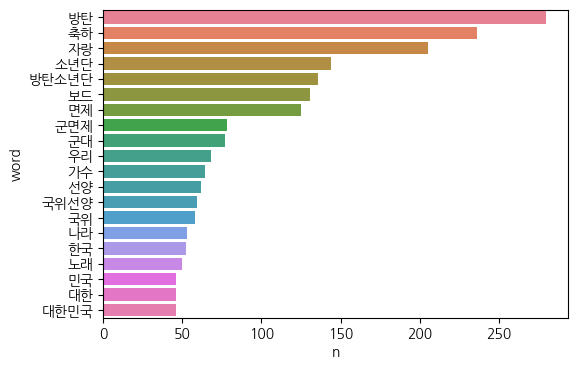

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top20, y='word', x='n', hue='word')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
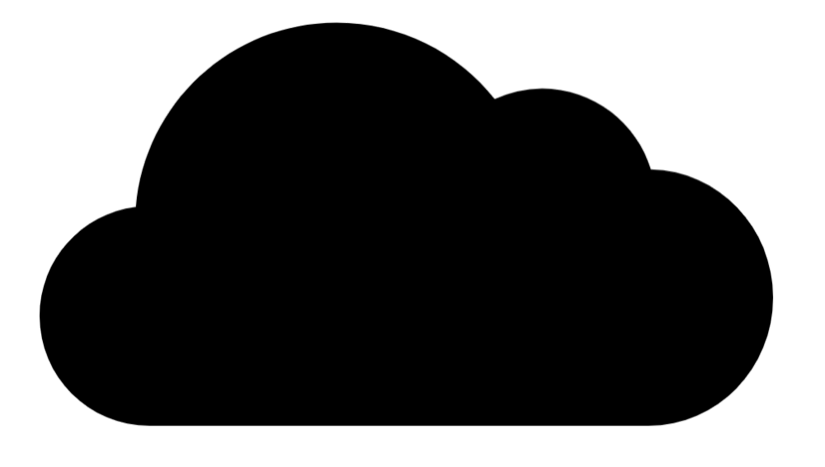

In [ ]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)

img = np.array(img)
img

In [ ]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2168 entries, 752 to 2144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2168 non-null   object
 1   n       2168 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.8+ KB


In [ ]:
df_word.sample(5)

,word,n
113,계기,1
1902,카메라,1
969,생일도,1
1197,아킬레스건,1
1410,위정,1


In [ ]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '민국': 46,
 '대한': 46,
 '대한민국': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '사람': 29,
 '정국': 29,
 '행복': 29,
 '라니': 29,
 '역사': 28,
 '사랑': 28,
 '코로나': 27,
 '차트': 27,
 '생일': 27,
 '핫백': 26,
 '감사': 24,
 '위라니': 24,
 '우리나라': 23,
 '축하해': 23,
 '미국': 22,
 '이것': 22,
 '전세계': 22,
 '싱글': 22,
 '인정': 22,
 '그룹': 22,
 '진심': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '활동': 19,
 '음악': 19,
 '요즘': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '올림픽': 15,
 '너희': 15,
 '문화': 15,
 '이제': 15,
 '국민': 15,
 '때문': 15,
 '국가': 15,
 '뉴스': 15,
 '기사': 14,
 '수고': 14,
 '숟가락': 14,
 '내가': 14,
 '대통령': 14,
 '멤버': 14,
 '기분': 14,
 '시국': 13,
 '아티스트': 13,
 '이름': 13,
 '한국인': 13,
 '눈물': 13,
 '지금': 12,
 '마이트': 12,
 '아시아': 12,
 '금메달': 12,
 '댓글': 12,
 '친구': 11,
 '남자': 11,
 '국뽕': 11,
 '기록': 11,
 '싱글차트': 11,

In [ ]:
wc = WordCloud(random_state=1234, font_path=FONT_PATH,
               width = 400, height = 400, background_color='white',
               mask = img)
wc

In [ ]:
%config inlineBackend.figure_format = 'retina'

In [ ]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(6, 4))
plt.imshow(imgWC);
plt.axis('off')

OSError: cannot open resource

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'A' : [1, 2, 3],
    'B' : [10, 20, 30]
})
df

,A,B
0,1,10
1,2,20
2,3,30


# 기말고사 예상

In [ ]:
print(df.apply(lambda x : x.max() - x.min(), axis=0))

A     2
B    20
dtype: int64


In [ ]:
print(df.apply(lambda x : x.max() - x.min()))

A     2
B    20
dtype: int64


In [ ]:
print(df.apply(lambda x : x.max() - x.min(), axis=1))

0     9
1    18
2    27
dtype: int64


In [ ]:
print(df.apply(lambda x : x.mean(), axis = 1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [ ]:
f = lambda x : x+5
df.apply(f)

,A,B
0,6,15
1,7,25
2,8,35


In [ ]:
f = lambda x : x*5
df.apply(f)

,A,B
0,5,50
1,10,100
2,15,150


In [ ]:
f = lambda x : x/5
df.apply(f)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [ ]:
f = lambda x : x/5
df.apply(f, axis=1)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [ ]:
print(df.apply(lambda x: x.mean(), axis=1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [ ]:
print(df.apply(lambda x: x.mean(), axis=0))

A     2.0
B    20.0
dtype: float64


In [ ]:
df.apply(lambda x: x.sum(), axis=0)

,0
A,6
B,60


In [ ]:
df.apply(sum, axis=0)

,0
A,6
B,60


In [ ]:
df.apply(sum, axis=1)

,0
0,11
1,22
2,33


In [ ]:
df.sum()

,0
A,6
B,60


In [ ]:
df.sum(axis=1)

,0
0,11
1,22
2,33


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'hobies' : [['reading', 'cooking'], ['gaming']]
})
df

,name,hobies
0,Alice,"[reading, cooking]"
1,Bob,[gaming]


In [ ]:
df_exploded = df.explode('hobies')
df_exploded

,name,hobies
0,Alice,reading
0,Alice,cooking
1,Bob,gaming


In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [ ]:
df = pd.DataFrame({
    'A': [[1, 2], [3]],
    'B': [['a', 'b'],['c']]
})
df

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]


In [ ]:
df.explode('A')

,A,B
0,1,"[a, b]"
0,2,"[a, b]"
1,3,[c]


In [ ]:
df.explode('B')

,A,B
0,"[1, 2]",a
0,"[1, 2]",b
1,[3],c


In [ ]:
display_side_by_side(df, df.explode(['A'])) # 시험 예상

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,1,"[a, b]"
0,2,"[a, b]"
1,3,[c]


In [ ]:
display_side_by_side(df, df.explode(['B'])) # 시험 예상

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,"[1, 2]",a
0,"[1, 2]",b
1,[3],c


In [ ]:
display_side_by_side(df, df.explode(['A','B'])) # 시험 예상

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,1,a
0,2,b
1,3,c


## 종료